<a href="https://colab.research.google.com/github/Pallav-Lama/deeplearning-projects/blob/main/Standford_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

stanford-dogs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip = zipfile.ZipFile('/content/stanford-dogs-dataset.zip')
zip.extractall()
zip.close()

In [ ]:
import tensorflow as tf

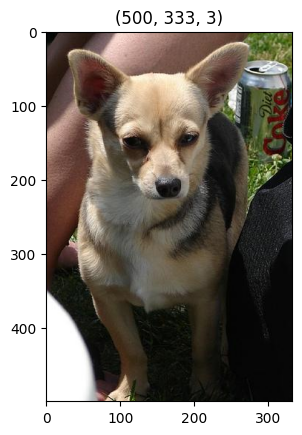

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/content/images/Images/n02085620-Chihuahua/n02085620_10074.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(image.shape)
plt.imshow(image)

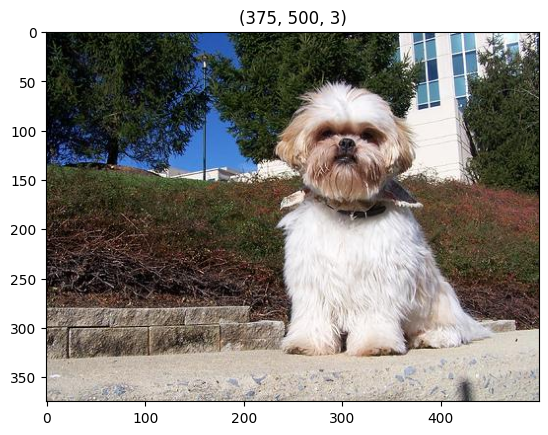

In [ ]:
image = cv2.imread('/content/images/Images/n02086240-Shih-Tzu/n02086240_1011.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(image.shape)
plt.imshow(image)


In [ ]:
#generators
train_image = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/images/Images',
    image_size = (200, 200),
    batch_size = 8,
    seed = 123,
    validation_split = 0.2,
    subset = 'training'
)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [ ]:
valid_image = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/images/Images',
    image_size = (200, 200),
    batch_size = 8,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation'
)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [ ]:
data_augmentation = tf.keras.models.Sequential()
data_augmentation.add(tf.keras.layers.RandomFlip('horizontal')),
data_augmentation.add(tf.keras.layers.RandomZoom(0.1)),
data_augmentation.add(tf.keras.layers.RandomRotation(0.1))

In [ ]:
train_image_augmented = train_image.map(lambda x, y : (data_augmentation (x), y))

In [ ]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Rescaling(1./255))
# model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (200, 200, 3)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D())
# model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D())
# model.add(tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D())
# model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D())
# #Flatten
# model.add(tf.keras.layers.Flatten())
# #Dense
# model.add(tf.keras.layers.Dense(2048, activation = 'relu'))
# model.add(tf.keras.layers.Dense(512, activation = 'relu'))
# model.add(tf.keras.layers.Dense(256, activation = 'relu'))
# model.add(tf.keras.layers.Dense(120, activation = 'softmax'))
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# history = model.fit(train_image, epochs = 50, validation_data = valid_image, batch_size = 16)

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
vgg16_layer = VGG16(weights='imagenet', include_top = False, input_shape=(200, 200, 3))
vgg16_layer.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    vgg16_layer,
    tf.keras.layers.Flatten(),
    #Dense
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(120, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_image_augmented, epochs = 15, validation_data = valid_image, batch_size = 16)

Epoch 1/15
2058/2058 [==============================] - 253s 120ms/step - loss: 4.1618 - accuracy: 0.0951 - val_loss: 3.4787 - val_accuracy: 0.1572
Epoch 2/15
2058/2058 [==============================] - 242s 118ms/step - loss: 3.5335 - accuracy: 0.1693 - val_loss: 3.1135 - val_accuracy: 0.2204
Epoch 3/15
2058/2058 [==============================] - 240s 116ms/step - loss: 3.3203 - accuracy: 0.2044 - val_loss: 3.0498 - val_accuracy: 0.2417
Epoch 4/15
2058/2058 [==============================] - 240s 117ms/step - loss: 3.1688 - accuracy: 0.2250 - val_loss: 2.9247 - val_accuracy: 0.2621
Epoch 5/15
2058/2058 [==============================] - 244s 118ms/step - loss: 3.0627 - accuracy: 0.2532 - val_loss: 2.8558 - val_accuracy: 0.2835
Epoch 6/15
2058/2058 [==============================] - 240s 117ms/step - loss: 2.9658 - accuracy: 0.2668 - val_loss: 2.8232 - val_accuracy: 0.2949
Epoch 7/15
2058/2058 [==============================] - 256s 125ms/step - loss: 2.8728 - accuracy: 0.2910 - val_

In [ ]:
#inception v3
inception_layer  = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top = False, input_shape=(200, 200, 3))
inception_layer.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    inception_layer,
    tf.keras.layers.Flatten(),
    #Dense
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(120, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_image_augmented, epochs = 10, validation_data = valid_image, batch_size = 16)

Epoch 1/10
2058/2058 [==============================] - 209s 98ms/step - loss: 2.0588 - accuracy: 0.4790 - val_loss: 1.1644 - val_accuracy: 0.6786
Epoch 2/10
2058/2058 [==============================] - 201s 97ms/step - loss: 1.6211 - accuracy: 0.5670 - val_loss: 1.0875 - val_accuracy: 0.6975
Epoch 3/10
2058/2058 [==============================] - 210s 102ms/step - loss: 1.5007 - accuracy: 0.5916 - val_loss: 1.1195 - val_accuracy: 0.6978
Epoch 4/10
2058/2058 [==============================] - 204s 99ms/step - loss: 1.4169 - accuracy: 0.6101 - val_loss: 1.1202 - val_accuracy: 0.7204
Epoch 5/10
2058/2058 [==============================] - 197s 96ms/step - loss: 1.3480 - accuracy: 0.6229 - val_loss: 1.0530 - val_accuracy: 0.7172
Epoch 6/10
2058/2058 [==============================] - 198s 96ms/step - loss: 1.2909 - accuracy: 0.6353 - val_loss: 1.0009 - val_accuracy: 0.7213
Epoch 7/10
2058/2058 [==============================] - 202s 98ms/step - loss: 1.2271 - accuracy: 0.6511 - val_loss: 